# Regressao Linear - Açudes da Paraíba - época da seca - até 2016
## http://www.aesa.pb.gov.br/aesa-website/monitoramento/volume-acude/?id_acude=531

In [1]:
import pandas as pd

In [5]:
# leitura do dataset
#
# Acude de Boqueirão com Recarga do Rio São Francisco - 01/10/2013 ate 31/12/2016
df = pd.read_excel(open("Boqueirao-EpocaDaSeca.xlsx",'rb'))
df.head()

,Açude,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm)
0,Epitácio Pessoa,31/10/2013,40.93,1.685039e+08,0
1,Epitácio Pessoa,30/11/2013,39.38,1.621124e+08,0
2,Epitácio Pessoa,31/12/2013,37.47,1.542777e+08,0
3,Epitácio Pessoa,31/01/2014,35.22,1.450076e+08,0
4,Epitácio Pessoa,28/02/2014,33.88,1.394859e+08,0


In [6]:
del df["Açude"]
df.head()

,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm)
0,31/10/2013,40.93,1.685039e+08,0
1,30/11/2013,39.38,1.621124e+08,0
2,31/12/2013,37.47,1.542777e+08,0
3,31/01/2014,35.22,1.450076e+08,0
4,28/02/2014,33.88,1.394859e+08,0


In [7]:
df.tail()

,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm)
34,31/08/2016,7.34,30221465.44,0
35,30/09/2016,6.70,27596072.02,0
36,31/10/2016,6.05,24888594.75,0
37,30/11/2016,5.39,22196764.40,0
38,31/12/2016,4.82,19828074.48,0


In [8]:
# converter atributo para data
df['Data do registro'] =  pd.to_datetime( df['Data do registro'], format="%d/%m/%Y") 
df.head()

,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm)
0,2013-10-31,40.93,1.685039e+08,0
1,2013-11-30,39.38,1.621124e+08,0
2,2013-12-31,37.47,1.542777e+08,0
3,2014-01-31,35.22,1.450076e+08,0
4,2014-02-28,33.88,1.394859e+08,0


In [9]:
# colocar a data como indice para fazer uma série temporal
df2 = df.set_index(pd.DatetimeIndex(df['Data do registro']))
#del df2['Data do registro']
df2.head()

,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm)
Data do registro,,,,
2013-10-31,2013-10-31,40.93,1.685039e+08,0
2013-11-30,2013-11-30,39.38,1.621124e+08,0
2013-12-31,2013-12-31,37.47,1.542777e+08,0
2014-01-31,2014-01-31,35.22,1.450076e+08,0
2014-02-28,2014-02-28,33.88,1.394859e+08,0


In [10]:
#del df2["Açude"]
df2.describe()

,Volume (%),Volume (m³),Volume de chuvas (mm)
count,39.000000,3.900000e+01,39.0
mean,20.041795,8.251010e+07,0.0
std,10.597193,4.362670e+07,0.0
min,4.820000,1.982807e+07,0.0
25%,10.930000,4.499237e+07,0.0
50%,18.630000,7.670369e+07,0.0
75%,29.165000,1.200656e+08,0.0
max,40.930000,1.685039e+08,0.0


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39 entries, 2013-10-31 to 2016-12-31
Data columns (total 4 columns):
Data do registro         39 non-null datetime64[ns]
Volume (%)               39 non-null float64
Volume (m³)              39 non-null float64
Volume de chuvas (mm)    39 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 1.5 KB


In [12]:
#del df2["Açude"]
#del df2["Data do registro"]
df2.head()

,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm)
Data do registro,,,,
2013-10-31,2013-10-31,40.93,1.685039e+08,0
2013-11-30,2013-11-30,39.38,1.621124e+08,0
2013-12-31,2013-12-31,37.47,1.542777e+08,0
2014-01-31,2014-01-31,35.22,1.450076e+08,0
2014-02-28,2014-02-28,33.88,1.394859e+08,0


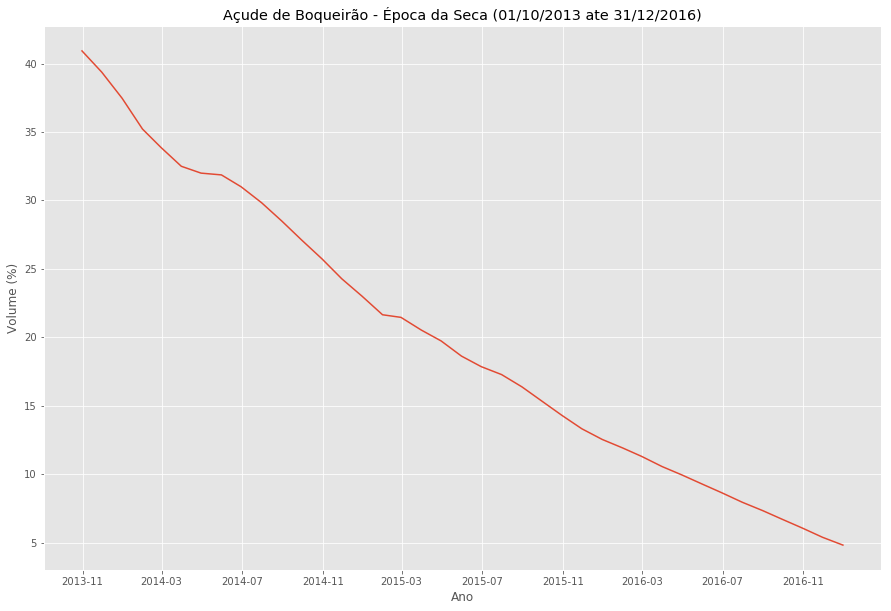

In [14]:
import matplotlib, matplotlib.pyplot as plt

matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))
plt.plot(df2["Volume (%)"])
# adcionando textos
plt.title("Açude de Boqueirão - Época da Seca (01/10/2013 ate 31/12/2016)")
plt.xlabel("Ano")
plt.ylabel("Volume (%)")
plt.savefig("Boqueirao-seca.pdf")

plt.show()

In [15]:
# criar uma coluna com os dias
df3 = df2
numero_de_dias = len(df3)
df3["dia"] = range(1,numero_de_dias+1)
df3.head()

,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm),dia
Data do registro,,,,,
2013-10-31,2013-10-31,40.93,1.685039e+08,0,1
2013-11-30,2013-11-30,39.38,1.621124e+08,0,2
2013-12-31,2013-12-31,37.47,1.542777e+08,0,3
2014-01-31,2014-01-31,35.22,1.450076e+08,0,4
2014-02-28,2014-02-28,33.88,1.394859e+08,0,5


In [16]:
len(df3) # numero de tuplas ou linhas ou medições

39

In [17]:
df3.tail()

,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm),dia
Data do registro,,,,,
2016-08-31,2016-08-31,7.34,30221465.44,0,35
2016-09-30,2016-09-30,6.70,27596072.02,0,36
2016-10-31,2016-10-31,6.05,24888594.75,0,37
2016-11-30,2016-11-30,5.39,22196764.40,0,38
2016-12-31,2016-12-31,4.82,19828074.48,0,39


In [18]:
# Preparar os dados para aplicar o modelo de regressao
import numpy, pandas as pd
import matplotlib, matplotlib.pyplot as plt
import sklearn.linear_model as lm
import warnings
warnings.filterwarnings('ignore')

df3.head()

,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm),dia
Data do registro,,,,,
2013-10-31,2013-10-31,40.93,1.685039e+08,0,1
2013-11-30,2013-11-30,39.38,1.621124e+08,0,2
2013-12-31,2013-12-31,37.47,1.542777e+08,0,3
2014-01-31,2014-01-31,35.22,1.450076e+08,0,4
2014-02-28,2014-02-28,33.88,1.394859e+08,0,5


In [19]:
# Aplicar o modelo de Regressao
olm = lm.LinearRegression()
X = numpy.array([x.toordinal() for x in df3.index])[:, numpy.newaxis]
y = df3['Volume (%)']
olm.fit(X, y)

# Predict values
yp = [olm.predict(x.toordinal())[0] for x in df3.index]

# Evaluate the model
olm_score = olm.score(X, y)

olm_score

0.98442326392929158

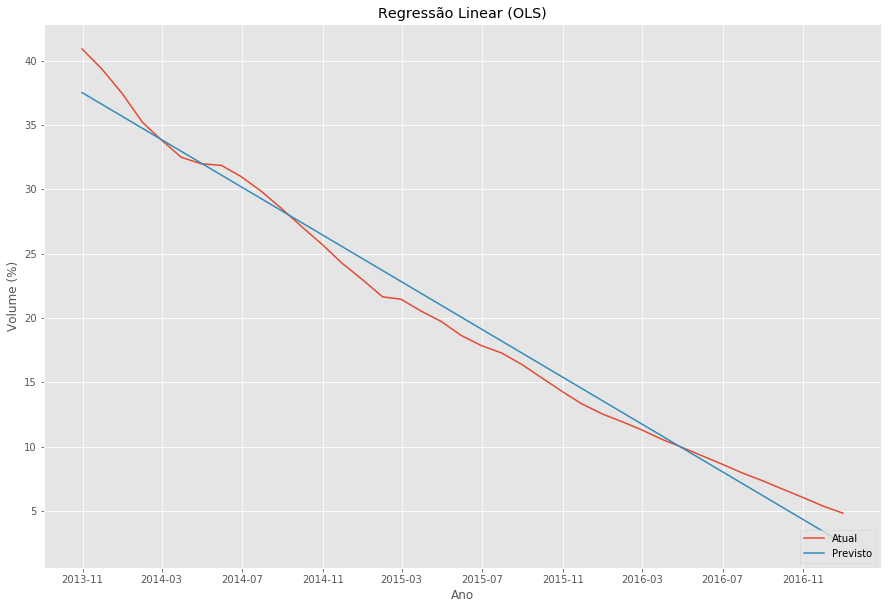

In [20]:
# Plota os dados
my_dpi=96
#plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
plt.figure( dpi=100)
%matplotlib inline
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))

# Plot both data sets
plt.plot(df3.index, y)
plt.plot(df3.index, yp)

# Add decorations
plt.title("Regressão Linear (OLS)")
plt.xlabel("Ano")
plt.ylabel("Volume (%)")
plt.legend(["Atual", "Previsto"], loc="lower right")
path="/Users/vladimiralencar/Dropbox/Slides-DataScienceUEPB-2017/Praticas/python/acudes"
plt.savefig(path + "/BoqueiraoComRecarga.pdf")
plt.show()

In [27]:
# preparando a saida para plotar

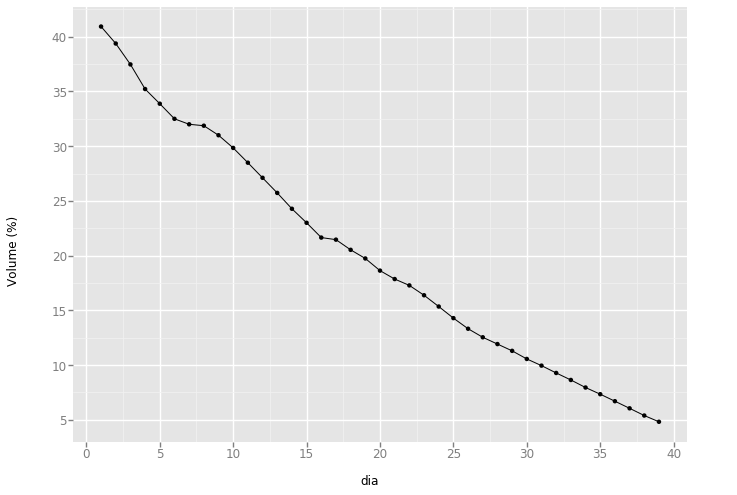

<ggplot: (294356863)>


In [21]:
from ggplot import *

print (ggplot(df3, aes('dia','Volume (%)')) + 
  geom_point(colour='steelblue') +
  geom_line(data = df3) 
 )


In [22]:
# criar o modelo de regressao
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  linear_model
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Use only one feature
x = df3["dia"]

split_dados = int(numero_de_dias * 0.66)

print (split_dados)
print (numero_de_dias)

25
39


In [23]:
# Split dos dados em conjuntos de treino/teste  


X_train = x[-split_dados:].reshape(-1, 1)
X_test = x[:-split_dados].reshape(-1, 1)

y = df3["Volume (%)"]

Y_train = y[-split_dados:]
Y_test = y[:-split_dados]


print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

25
14
25
14


In [24]:
# usar o modelo de regressão linear 
X = X_train
Y = Y_train  

regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Variance score: %.2f' % regr.score(X_test, Y_test))


print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - Y_test) ** 2))

Variance score: 0.17
Mean squared error: 18.93


In [25]:
# a reta de regressao
a = regr.coef_[0]
b = regr.intercept_
print(' y = {0} * x + {1}'.format(a, b))

 y = -0.7633384615384611 * x + 33.88733846153845


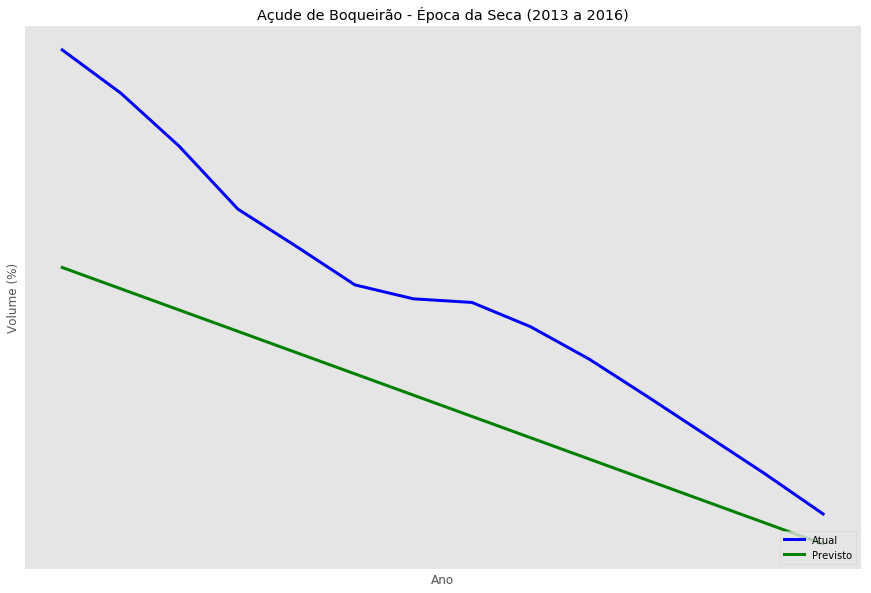

In [26]:
# Plot outputs
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))

# Plot both data sets
#plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_test, color='blue',
         linewidth=3)
plt.plot(X_test, regr.predict(X_test), color='green',
         linewidth=3)

plt.xticks(())
plt.yticks(())

# Add decorations
plt.title("Açude de Boqueirão - Época da Seca (2013 a 2016)")
plt.xlabel("Ano")
plt.ylabel("Volume (%)")
plt.legend(["Atual", "Previsto",], loc="lower right")
path="/Users/vladimiralencar/Dropbox/Slides-DataScienceUEPB-2017/Praticas/python/acudes"
plt.savefig(path + "/BoqueiraoComRecarga.pdf")
plt.show()



In [27]:
# Plot usando o pacote  ggplot2 for python

# converter o X para lista
x = []
for i in range(len(X_test)):
    x.append(X_test[i][0])

dfs = pd.DataFrame({"dia": x , "Volume%" : Y_test})  #{'col1': ts1, 'col2': ts2}

dfs.head()

,Volume%,dia
Data do registro,,
2013-10-31,40.93,1
2013-11-30,39.38,2
2013-12-31,37.47,3
2014-01-31,35.22,4
2014-02-28,33.88,5


In [28]:
# Construir um dataframe para a predicao
print("predição")
dfpredict = pd.DataFrame({"dia": x , "Volume%" : regr.predict(X_test)})  #{'col1': ts1, 'col2': ts2}
dfpredict.head()

predição


,Volume%,dia
0,33.124000,1
1,32.360662,2
2,31.597323,3
3,30.833985,4
4,30.070646,5


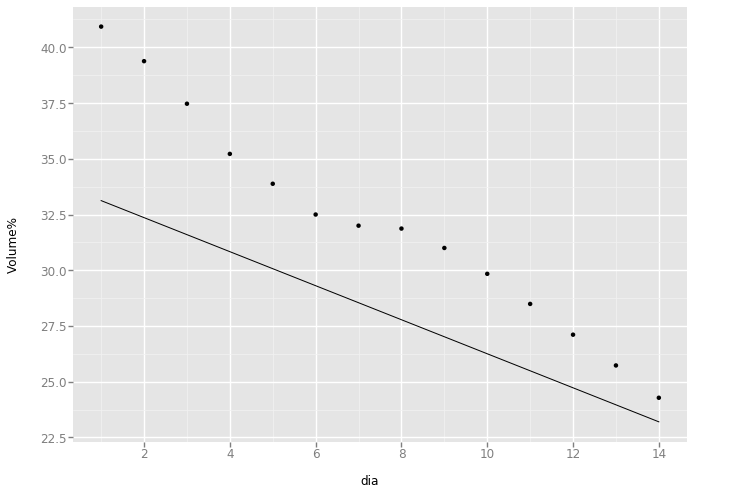

<ggplot: (295744695)>


In [29]:
# using ggplot2 for python
# !pip install ggplot
from ggplot import *

print (ggplot(dfs, aes('dia', 'Volume%')) + 
  geom_point(colour='steelblue') +
  geom_line(data = dfpredict) 
 )

In [30]:
# predicao futura
numero_de_dias = len(X_train)
numero_de_dias

25

In [34]:
regr.predict([30])[0]

10.987184615384617

In [35]:
# predicao para 30 dias
pred = regr.predict([30])[0]

print ("Volume Boqueirão depois de um ano = %6.2f %%" % (pred))

Volume Boqueirão depois de um ano =  10.99 %


In [39]:
# predicao para 60 dias
pred = regr.predict([40])[0]

print ("Volume Boqueirão depois de 40 dias = %6.2f %%" % (pred))

Volume Boqueirão depois de 40 dias =   3.35 %


In [43]:
# predicao até acabar a água

dias = 1
while (True):
    pred = regr.predict([dias])[0]
    if pred < 0:
        break
    print ("Volume Boqueirão depois de %d dias -> %-5.2f%%" % (dias,pred))
    dias = dias + 1
pred = regr.predict([dias])[0]
print ("Volume Boqueirão depois de %d dias -> %-5.2f%%" % (dias,pred))

Volume Boqueirão depois de 1 dias -> 33.12%
Volume Boqueirão depois de 2 dias -> 32.36%
Volume Boqueirão depois de 3 dias -> 31.60%
Volume Boqueirão depois de 4 dias -> 30.83%
Volume Boqueirão depois de 5 dias -> 30.07%
Volume Boqueirão depois de 6 dias -> 29.31%
Volume Boqueirão depois de 7 dias -> 28.54%
Volume Boqueirão depois de 8 dias -> 27.78%
Volume Boqueirão depois de 9 dias -> 27.02%
Volume Boqueirão depois de 10 dias -> 26.25%
Volume Boqueirão depois de 11 dias -> 25.49%
Volume Boqueirão depois de 12 dias -> 24.73%
Volume Boqueirão depois de 13 dias -> 23.96%
Volume Boqueirão depois de 14 dias -> 23.20%
Volume Boqueirão depois de 15 dias -> 22.44%
Volume Boqueirão depois de 16 dias -> 21.67%
Volume Boqueirão depois de 17 dias -> 20.91%
Volume Boqueirão depois de 18 dias -> 20.15%
Volume Boqueirão depois de 19 dias -> 19.38%
Volume Boqueirão depois de 20 dias -> 18.62%
Volume Boqueirão depois de 21 dias -> 17.86%
Volume Boqueirão depois de 22 dias -> 17.09%
Volume Boqueirão de